# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## APCOMP 209a Final Project

**Harvard University**<br/>
**Fall 2023**<br/>
**Instructors**: Pavlos Protopapas and Kevin Rader<br/>
**Group Members**: Davide Bray, Regina Lin, Shang Wang, Susannah Su

<hr style="height:2.4pt">

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### Import Libraries

In [2]:
import pandas as pd
import re
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Disable scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)


<a id="contents"></a>

## Notebook Contents

- [**Data Description**](#data_sescription)
- [**Problem Statement**](#problem_statement)
- [**Project Organization**](#project_organization)

<a id="data_description"></a>

## Data Description
[Return to contents](#contents)

 (From Kaggle, see https://www.kaggle.com/datasets/cnic92/200-financial-indicators-of-us-stocks-20142018?select=2018_Financial_Data.csv)

 There are in total 5 datasets: `2014_Financial_Data.csv`, `2015_Financial_Data.csv`, `2016_Financial_Data.csv`, `2017_Financial_Data.csv`, `2018_Financial_Data.csv`.

Each dataset contains 200+ financial indicators, that are commonly found in the 10-K filings each publicly traded company releases yearly, for a plethora of US stocks (on average, 4k stocks are listed in each dataset). 

The dataset was built by the author leveraging Financial Modeling Prep API and pandas_datareader.

#### Important remarks regarding the datasets
1. Some financial indicator values are missing (`nan` cells), so the user can select the best technique to clean each dataset (`dropna`, `fillna`, etc.).
2. There are outliers, meaning extreme values that are probably caused by mistypings. Also in this case, the user can choose how to clean each dataset (have a look at the 1% - 99% percentile values).
3. The third-to-last column, `Sector`, lists the sector of each stock. Indeed, in the US stock market each company is part of a sector that classifies it in a macro-area. Since all the sectors have been collected (Basic Materials, Communication Services, Consumer Cyclical, Consumer Defensive, Energy, Financial Services, Healthcare, Industrial, Real Estate, Technology and Utilities), the user has the option to perform per-sector analyses and comparisons.
4. The second-to-last column, `PRICE VAR [%]`, lists the percent price variation of each stock for the year. For example, if we consider the dataset `2015_Financial_Data.csv`, we will have:
    - 200+ financial indicators for the year 2015;
    - percent price variation for the year 2016 (meaning from the first trading day on Jan 2016 to the last trading day on Dec 2016).

5. The last column, `class`, lists a binary classification for each stock, where
    - for each stock, if the `PRICE VAR [%]` value is positive, `class = 1`. From a trading perspective, the `1` identifies those stocks that an hypothetical trader should **BUY** at the start of the year and sell at the end of the year for a profit.
    - for each stock, if the `PRICE VAR [%]` value is negative, `class = 0`. From a trading perspective, the `0` identifies those stocks that an hypothetical trader should **NOT BUY**, since their value will decrease, meaning a loss of capital.

The columns `PRICE VAR [%]` and `class` make possible to use the datasets for both classification and regression tasks:
- If the we wish to train a machine learning model so that it learns to classify those stocks that in buy-worthy and not buy-worthy, it is possible to get the targets from the class column;
- If the we wish to train a machine learning model so that it learns to predict the future value of a stock, it is possible to get the targets from the `PRICE VAR [%]` column.

<a id="problem_statement"></a>

## Problem Statement

[Return to contents](#contents)

This project seeks to develop a machine learning model that predicts stock price variations using a range of financial indicators, without relying on individual stock identifiers (tickers). The aim is to uncover general patterns in the stock market that transcend company-specific characteristics, thereby creating a broadly applicable predictive tool. The challenge involves accurately capturing the complex dynamics of the market using available financial data, and ensuring that the model is robust and generalizable across various stocks and market conditions.

The project will begin with a simple baseline model, then advance to more sophisticated algorithms to improve prediction accuracy. Success will be measured by the model's ability to reliably predict stock price changes, providing a valuable asset for investors and analysts in making informed financial decisions. This endeavor is poised to enhance understanding and forecasting of market behaviors using machine learning techniques.

<a id="project_organization"></a>

## Project Organization

[Return to contents](#contents)

### Part 0: Data Preprocessing & Feature Selection / Exploratory Data Analysis

#### Overview
This foundational part focuses on preparing the dataset for various analyses and model building in the subsequent parts. The processes conducted here are crucial for ensuring the quality and effectiveness of the models and analyses.

#### Methodology
1. **Basic Processing**
* Load the dataset and rename the columns for clarity.
* Separate predictors and target variables (`price_var20xx`, `class20xx`, `xx` correspond to the year).
* General information on predictors based on industry knowledge and relevance.

2. **EDA**
* Statistical summary of datasets to understand distributions and central tendencies.
* Correlation analysis to identify highly correlated features.
* Identification of trends and patterns specific to categorical variables.

3. **Examine Missingness**
* Preliminary examination of nullness.
* Identifying the Patterns of Missing Data.

4. **Handling Outliers**
* Dropping large outliers in skewed y variable

5. **Further Preparation for Pipeline**
* Train-test splitting first to prevent data leakage.
* Scaling of features to normalize data.
* K-NN imputation to handle missing values without making assumptions about the underlying distribution of the variables

### Part 1: Baseline Model Selection and Evaluation

#### Objective 
To establish a simple yet effective baseline model for predicting stock performance.

#### Methodology
1. **Model Selection and Building**
* Start with a simple mean/median model as a baseline.
    - Mean/median prediction model
    - Multiple linear regression
    - Single decision tree
* Train the model on our dataset and perform an initial evaluation using $MSE$.

2. **Cross Validations**
* Implement basic cross-validation (like k-fold CV) to assess the model’s performance more reliably.

3. **Interim Interpretation**
* Provide an initial interpretation of the model's performance, focusing on its strengths and limitations based on the evaluation metrics.
* Select the baseline model.

### Part 2: More Complex Models

#### Objective 
The objective of this stage is to explore and evaluate more sophisticated machine learning models beyond the baseline model. These models are expected to capture complex patterns and relationships in the data that the baseline model might miss. The goal is to improve prediction accuracy and reliability in forecasting stock performance, while also gaining deeper insights into how different financial indicators influence stock prices.

#### Methodology
1. **Selection of More Complex Models and Building**
* Identify a set of more complex models:
    - Ridge regression
    - LASSO regression
    - Elastic net regression
    - Random forest regressors
    - Gradient boosting
* Train the model on our dataset and perform an initial evaluation using $MSE$.

2. **Cross Validations**
* Implement basic cross-validation (like k-fold CV) to assess the model’s performance more reliably.
* Include a basic hyperparameter tuning to find a reasonably good configuration for each model, while avoiding extensive optimization at this stage.

3. **Performance Evaluation and Final Model Selection**
* Evaluate the tuned models using $MSE$.
* Compare the complex models with the baseline model.
* Select the final model.

### Part 3: Network Analysis of Stock Market Interdependencies

#### Objective
Analyze the network of interdependencies among stocks or sectors.

#### Methodology
1. **Network Construction**
* Construct a network graph based on the relationships derived from the preprocessed data.

2. **Network Analysis**
* Centrality measures to identify influential stocks.
* Community detection to find clusters of interrelated stocks.
* Dynamic analysis over different years to observe changes.

3. **Evaluation**
* Evaluate the network’s insights on stock market dynamics.

<a id="project_organization"></a>

# Part 0: Data Preprocessing & Feature Selection / Exploratory Data Analysis

[Return to contents](#contents)

## 0.1 Basic Processing

In [3]:
# Load raw data
df2014 = pd.read_csv('data/2014_Financial_Data.csv')
df2015 = pd.read_csv('data/2015_Financial_Data.csv')
df2016 = pd.read_csv('data/2016_Financial_Data.csv')
df2017 = pd.read_csv('data/2017_Financial_Data.csv')
df2018 = pd.read_csv('data/2018_Financial_Data.csv')

In [4]:
# Inspect how does it look like -- 
# The "Unnamed: 0" column is probably stock ticker
df2014.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per S

In [5]:
# Check that the df of different years all have same columns
# They do (except the 2nd to last column which is our potential response variable) -- they all have 225 columns
print(df2014.columns, '\n')
print(df2015.columns, '\n')
print(df2016.columns, '\n')
print(df2017.columns, '\n')
print(df2018.columns, '\n')

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', '2015 PRICE VAR [%]', 'Class'],
      dtype='object', length=225) 

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', '2016 PRICE VAR [%]', 'Class'],
      dtype='object', length=225) 

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R

In [6]:
# Rename the only different column names before we concatenate the dataframes

df2014.rename(columns={'2015 PRICE VAR [%]': 'price_var_next_yr_%'}, inplace=True)
df2015.rename(columns={'2016 PRICE VAR [%]': 'price_var_next_yr_%'}, inplace=True)
df2016.rename(columns={'2017 PRICE VAR [%]': 'price_var_next_yr_%'}, inplace=True)
df2017.rename(columns={'2018 PRICE VAR [%]': 'price_var_next_yr_%'}, inplace=True)
df2018.rename(columns={'2019 PRICE VAR [%]': 'price_var_next_yr_%'}, inplace=True)

df2014.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per S

In [7]:
# Rename the first column as 'ticker'
df2014.rename(columns={'Unnamed: 0': 'Ticker'}, inplace=True)
df2015.rename(columns={'Unnamed: 0': 'Ticker'}, inplace=True)
df2016.rename(columns={'Unnamed: 0': 'Ticker'}, inplace=True)
df2017.rename(columns={'Unnamed: 0': 'Ticker'}, inplace=True)
df2018.rename(columns={'Unnamed: 0': 'Ticker'}, inplace=True)

df2014.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share

### Concatenating Annual Financial Dataframes

We now continue pre-processing by combining annual financial dataframes into one and adding year as a new predictor.

In [8]:
# Add a new column indicating year
df2014.insert(0, 'Year', '2014')
df2015.insert(0, 'Year', '2015')
df2016.insert(0, 'Year', '2016')
df2017.insert(0, 'Year', '2017')
df2018.insert(0, 'Year', '2018')

df2014.head()

,Year,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per 

In [9]:
# Concatenating dataframes vertically
df = pd.concat([df2014, df2015, df2016, df2017, df2018], axis=0)
df = df.reset_index(drop=True)

In [10]:
df.tail()

,Year,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per 

### Final Visual Clean Up

We drop the response variable 'Class" because we decide to pursue a regression analysis with the response "price_var_next_yr_%" and we do not need the "Ticker" as a predictor.

In [11]:
df = df.drop(columns=['Ticker', 'Class'])

In [12]:
# Function to convert camel case to snake case and handle pre-existing underscores
def camel_to_snake(name):
    # Insert an underscore between lowercase followed by uppercase
    s1 = re.sub('([a-z])([A-Z])', r'\1_\2', name)
    # Handle pre-existing underscores (avoid double underscores)
    s2 = re.sub('_+', '_', s1)
    return s2.lower()

In [13]:
# Then convert any camelCase to snake_case
df.columns = [camel_to_snake(col) for col in df.columns]

In [14]:
# Renaming columns to follow industry practice
df.columns = [col.replace(' ', '_').lower() for col in df.columns]

In [15]:
df.head()

,year,revenue,revenue_growth,cost_of_revenue,gross_profit,r&d_expenses,sg&a_expense,operating_expenses,operating_income,interest_expense,earnings_before_tax,income_tax_expense,net_income_-_non-controlling_int,net_income_-_discontinued_ops,net_income,preferred_dividends,net_income_com,eps,eps_diluted,weighted_average_shs_out,weighted_average_shs_out_(dil),dividend_per_share,gross_margin,ebitda_margin,ebit_margin,profit_margin,free_cash_flow_margin,ebitda,ebit,consolidated_income,earnings_before_tax_margin,net_profit_margin,cash_and_cash_equivalents,short-term_investments,cash_and_short-term_investments,receivables,inventories,total_current_assets,"property,_plant_&_equipment_net",goodwill_and_intangible_assets,long-term_investments,tax_assets,total_non-current_assets,total_assets,payables,short-term_debt,total_current_liabilities,long-term_debt,total_debt,deferred_revenue,tax_liabilities,deposit_liabilities,total_non-current_liabilities,total_liabilities,other_comprehensive_income,retained_earnings_(deficit),total_shareholders_equity,investments,net_debt,other_assets,other_liabilities,depreciation_&_amortization,stock-based_compensation,operating_cash_flow,capital_expenditure,acquisitions_and_disposals,investment_purchases_and_sales,investing_cash_flow,issuance_(repayment)_of_debt,issuance_(buybacks)_of_shares,dividend_payments,financing_cash_flow,effect_of_forex_changes_on_cash,net_cash_flow_/_change_in_cash,free_cash_flow,net_cash/marketcap,price_book_value_ratio,price_to_book_ratio,price_to_sales_ratio,price_earnings_ratio,price_to_free_cash_flows_ratio,price_to_operating_cash_flows_ratio,price_cash_flow_ratio,price_earnings_to_growth_ratio,price_sales_ratio,dividend_yield,enterprise_value_multiple,price_fair_value,ebitper_revenue,ebtper_ebit,niper_ebt,gross_profit_margin,operating_profit_margin,pretax_profit_margin,net_profit_margin,effective_tax_rate,return_on_assets,return_on_equity,return_on_capital_employed,n_iper_ebt,e_btper_ebit,e_bitper_revenue,payables_turnover,inventory_turnover,fixed_asset_turnover,asset_turnover,current_ratio,quick_ratio,cash_ratio,days_of_sales_outstanding,days_of_inventory_outstanding,operating_cycle,days_of_payables_outstanding,cash_conversion_cycle,debt_ratio,debt_equity_ratio,longterm_debt_to_capitalization,total_debt_to_capitalization,interest_coverage,cash_flow_to_debt_ratio,company_equity_multiplier,operating_cash_flow_per_share,free_cash_flow_per_share,cash_per_share,payout_ratio,operating_cash_flow_sales_ratio,free_cash_flow_operating_cash_flow_ratio,cash_flow_coverage_ratios,short_term_coverage_ratios,capital_expenditure_coverage_ratios,dividendpaid_and_capex_coverage_ratios,dividend_payout_ratio,revenue_per_share,net_income_per_share,operating_cash_flow_per_share,free_cash_flow_per_share,cash_per_share,book_value_per_share,tangible_book_value_per_share,shareholders_equity_per_share,interest_debt_per_share,market_cap,enterprise_value,pe_ratio,price_to_sales_ratio,pocf_ratio,pfcf_ratio,pb_ratio,ptb_ratio,ev_to_sales,enterprise_value_over_ebitda,ev_to_operating_cash_flow,ev_to_free_cash_flow,earnings_yield,free_cash_flow_yield,debt_to_equity,debt_to_assets,net_debt_to_ebitda,current_ratio,interest_coverage,income_quality,dividend_yield,payout_ratio,sg&a_to_revenue,r&d_to_revenue,intangibles_to_total_assets,capex_to_operating_cash_flow,capex_to_revenue,capex_to_depreciation,stock-based_compensation_to_revenue,graham_number,roic,return_on_tangible_assets,graham_net-net,working_capital,tangible_asset_value,net_current_asset_value,invested_capital,average_receivables,average_payables,average_inventory,days_sales_outstanding,days_payables_outstanding,days_of_inventory_on_hand,receivables_turnover,payables_turnover,inventory_turnover,roe,capex_per_share,gross_profit_growth,ebit_growth,operating_income_growth,net_income_growth,eps_growth,eps_diluted_growth,weighted_average_shares_growth,weighted_average_shares_diluted_growth,dividends_per_share_growth,operating_cash_flow_growth,free_cash_flow_g

In [16]:
df.shape

(22077, 224)

### An Informative Description of Predictors

From investopedia: https://www.investopedia.com/articles/basics/04/100804.asp

Stock prices are ultimately determined by supply and demand, which are influenced by both fundamental and technical factors.

Fundamental factors relate to a company's financial performance, especially earnings. The earnings per share (EPS) represents the owner's proportional share of earnings. The P/E ratio expresses the valuation multiple, i.e. how much an investor is willing to pay for those future earnings. Earnings can also be measured by cash flow per share or dividends per share. The valuation multiple depends on the expected earnings growth rate and the discount rate, which represents inflation and the perceived riskiness of the stock. Higher expected growth leads to a higher multiple, while higher risk or inflation leads to a lower multiple.

Technical factors are from external market conditions that drive supply and demand. Historically, low inflation boosts multiples while high inflation lowers them. Deflation hurts pricing power. Stocks tend to move with the overall market and their industry peers, and stocks compete with other asset classes like bonds and commodities. Regarding investors, middle-aged investors tend to invest more in stocks. Furthermore, stocks build momentum or revert to the mean. Large cap stocks have high liquidity while small caps often have a liquidity discount. Finally, unforeseen positive or negative events impact sentiment, and psychology often weighs more heavily than fundamentals in the short term. Behavioral finance aims to explain irrational market behavior.

### Reconciliation

While technicals often dominate in the short run, fundamentals determine long-term prices. Different investors weigh the factors differently, but both play a critical role in the complicated dynamics of supply, demand, and human psychology. In our previous submissions, we manually pre-selected factors based on research, but we have since refrained from this method as it introduces biases into our model. It is also tediously unreasonable to plot each individual predictor and manually select from them, thus we will select predictors based on missingness in the next section. In other words, we will drop predictors with too many missing values because imputing values for factors with too much missing data will also introduce biases into our model. 

Additionally, we can evidentially see that many of our factors are highly correlated and must be dealt with for a robust model. We attempted to eliminate correlated values using PCA to reduce dimensionality, but our results did not end up improving our resulting analysis. When we refine our final model, we will include further methods to deal with these correlated predictors and refine our model.

## 0.2 EDA

### Descriptive Statistics

We begin with a simple examination of the mean, std, max, min, and quartiles of our data.

In [17]:
print(df.describe())

                 revenue  revenue_growth    cost_of_revenue      gross_profit  \
count         20906.0000      19989.0000         20306.0000        20870.0000   
mean     5161618858.1768          3.6222    3258565393.3082   1970452466.9661   
std     31973144008.1825        312.6482   25830920897.6479   8735750256.6540   
min      -627616000.0000        -12.7693   -2986887894.7368 -12808000000.0000   
25%        58807370.2500         -0.0147       3211750.0000     30355750.0000   
50%       435251000.0000          0.0576     153011500.0000    194352500.0000   
75%      2287259000.0000          0.1824    1180223750.0000    880603500.0000   
max   1886894000000.0000      42138.6639 1581527000000.0000 462160000000.0000   

          r&d_expenses      sg&a_expense  operating_expenses  \
count       19939.0000        20408.0000          20375.0000   
mean    103333292.2535    869927885.8259     1368669852.7580   
std     767606165.7073   3804283410.4130     5662983943.1137   
min    -109800

### Correlation Between Predictors

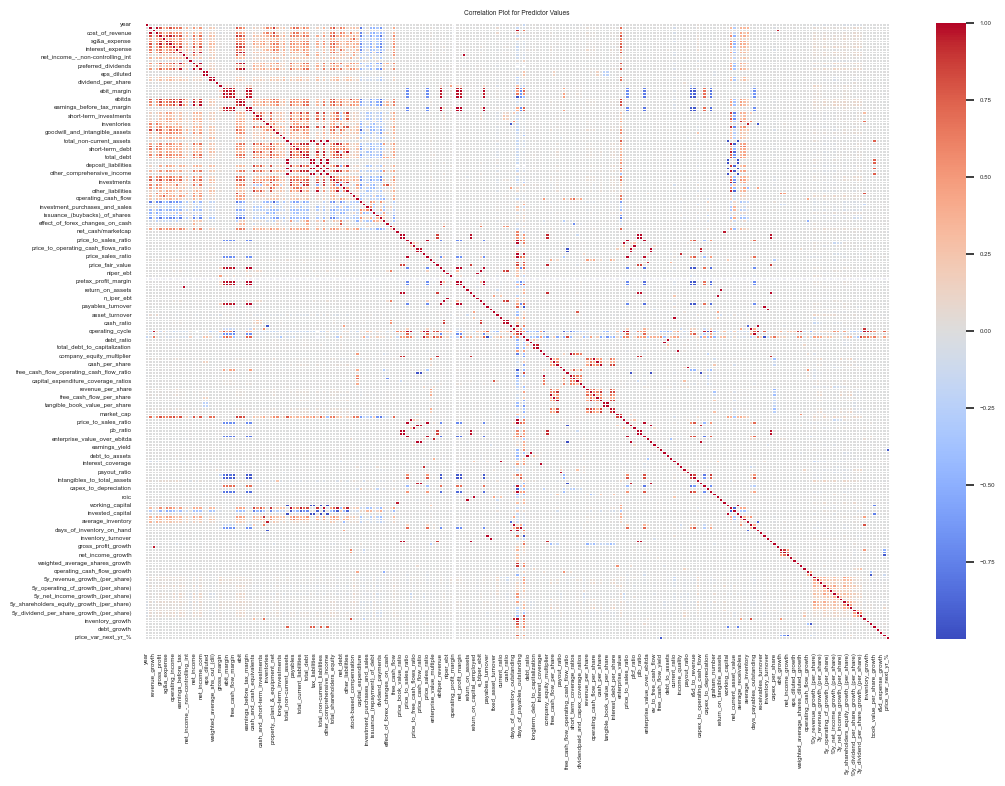

In [18]:
corr_pred = df.drop(columns=['sector'])
correlation_matrix = corr_pred.corr()
# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.set(font_scale=.4) 
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot for Predictor Values')
plt.show()

We plot a correlation heatmap as seen above, to determine confounding variables which may yield multicollinearity that we will need to drop before modeling. This provides us with a visual representation of how strongly variables are correlated with each other. Positive values, colored red, indicate a positive correlation, while negative values (in blue) indicate
a negative correlation. Gray values are close to zero, and suggest a weak or no correlation. Though the plot is difficult to interpret due to having many features, we observe a significant orange hue in the top-left corner, indicating a positive correlation ranging from 0.5 to 0.75. Additionally, there is a blue stripe near the top left, signifying a negative correlation in the range of -0.25 to -0.5. This tells us that financial metrics such as revenue, net income, profit margin, etc. are very correlated, which makes sense logically. The negatively correlated variables correspond with other metrics such as depreciation, investing cash flow, etc. that correlate negatively with revenue and positive metrics. In our final model, we will definitely need to further reduce financial metrics that give similar information.

### Examining Imbalance Issues

In [19]:
df.dtypes

year                                           object
revenue                                       float64
revenue_growth                                float64
cost_of_revenue                               float64
gross_profit                                  float64
r&d_expenses                                  float64
sg&a_expense                                  float64
operating_expenses                            float64
operating_income                              float64
interest_expense                              float64
earnings_before_tax                           float64
income_tax_expense                            float64
net_income_-_non-controlling_int              float64
net_income_-_discontinued_ops                 float64
net_income                                    float64
preferred_dividends                           float64
net_income_com                                float64
eps                                           float64
eps_diluted                 

It looks like only the predictors `year` and `sector` are categorical variables that might introduce imabalance issues. Let's invistigate then.

In [20]:
def calculate_class_distribution_summary(df):
    """
    Generate a summary table showing the distribution of classes for categorical columns.

    Parameters:
    - df (pandas.DataFrame): The DataFrame for which to calculate class distributions.

    Returns:
    - pandas.DataFrame: A DataFrame containing the class distribution summary.
    """
    class_summary = pd.DataFrame()

    # Loop over categorical columns and calculate class distribution
    for col in df.select_dtypes(include=['object', 'category']).columns:
        # Get class distribution for the current column
        dist = df[col].value_counts(normalize=True).reset_index()
        dist.columns = ['Class', 'Percentage']
        dist['Feature'] = col
        dist['Count'] = df[col].value_counts().reset_index(drop=True)
        
        # Append to the summary DataFrame
        class_summary = pd.concat([class_summary, dist], ignore_index=True)

    return class_summary

In [21]:
predictors_cat_sum = calculate_class_distribution_summary(df)
print(predictors_cat_sum)

                     Class  Percentage Feature  Count
0                     2017      0.2247    year   4960
1                     2016      0.2173    year   4797
2                     2018      0.1989    year   4392
3                     2015      0.1866    year   4120
4                     2014      0.1725    year   3808
5       Financial Services      0.2138  sector   4720
6               Healthcare      0.1497  sector   3305
7               Technology      0.1416  sector   3126
8              Industrials      0.1254  sector   2768
9        Consumer Cyclical      0.1119  sector   2471
10         Basic Materials      0.0609  sector   1344
11             Real Estate      0.0562  sector   1241
12                  Energy      0.0551  sector   1217
13      Consumer Defensive      0.0418  sector    922
14               Utilities      0.0235  sector    518
15  Communication Services      0.0202  sector    445


Text(0.5, 1.0, 'Class Distribution Summary')

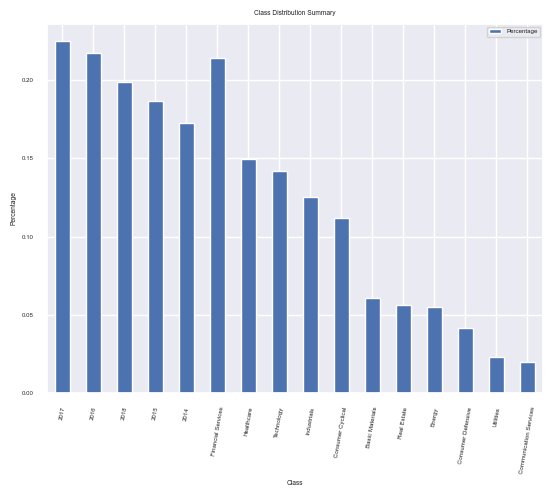

In [22]:
predictors_cat_sum.plot.bar(x='Class', y= 'Percentage', rot = 80)
plt.ylabel("Percentage")
plt.title('Class Distribution Summary')



We notice that sector distribution does show some imbalance, which is common in real-world datasets where some categories (in our case, sectors like Financial Services, Healthcare, and
Technology) are more prevalent than others (like Utilities and Communication Services).

## 0.3 Handling Missingingness

### Examine Nullness (Preliminary)

From below we see that our data set does have quite a few missing values. We will handle the missingness using imputation methods later.

We can also use the `missingno` (missing "no") library to visualize the patterns of missing data.

**Interpretation Strategies:**
* Randomness: If the missingness appears random without a discernible pattern across the matrix plot, it may suggest that the data is Missing Completely At Random (MCAR).
* Patterns or Bands: Systematic patterns or bands in the matrix plot may suggest that the data is Missing At Random (MAR) where missingness is systematic and related to other observed variables.
* Blocks: If you see blocks of white in the matrix plot, this suggests that there might be groups of data that are Missing Not At Random (MNAR), indicating a potential inherent problem with the data collection process.
* Correlation in Heatmap: High correlation in the heatmap suggests that the missingness of one variable is not independent of another, which is common with MAR or MNAR.

In [23]:
#Check for total null values in individual dataframes
df2014.isnull().sum()

Year                                             0
Ticker                                           0
Revenue                                         44
Revenue Growth                                 236
Cost of Revenue                                 74
Gross Profit                                    52
R&D Expenses                                   136
SG&A Expense                                    59
Operating Expenses                              63
Operating Income                                55
Interest Expense                                63
Earnings before Tax                             80
Income Tax Expense                              66
Net Income - Non-Controlling int               149
Net Income - Discontinued ops                  149
Net Income                                      23
Preferred Dividends                            149
Net Income Com                                  15
EPS                                             72
EPS Diluted                    

In [24]:
df2015.isnull().sum()

Year                                             0
Ticker                                           0
Revenue                                         67
Revenue Growth                                 340
Cost of Revenue                                193
Gross Profit                                    65
R&D Expenses                                   265
SG&A Expense                                   170
Operating Expenses                             174
Operating Income                                42
Interest Expense                               175
Earnings before Tax                            103
Income Tax Expense                             151
Net Income - Non-Controlling int               287
Net Income - Discontinued ops                  287
Net Income                                     165
Preferred Dividends                            287
Net Income Com                                 119
EPS                                             96
EPS Diluted                    

In [25]:
df2016.isnull().sum()

Year                                             0
Ticker                                           0
Revenue                                        489
Revenue Growth                                 649
Cost of Revenue                                640
Gross Profit                                   492
R&D Expenses                                   713
SG&A Expense                                   613
Operating Expenses                             620
Operating Income                               465
Interest Expense                               620
Earnings before Tax                            531
Income Tax Expense                             596
Net Income - Non-Controlling int               738
Net Income - Discontinued ops                  738
Net Income                                     606
Preferred Dividends                            738
Net Income Com                                 558
EPS                                            522
EPS Diluted                    

In [26]:
df2017.isnull().sum()

Year                                             0
Ticker                                           0
Revenue                                        525
Revenue Growth                                 724
Cost of Revenue                                679
Gross Profit                                   534
R&D Expenses                                   787
SG&A Expense                                   661
Operating Expenses                             661
Operating Income                               504
Interest Expense                               677
Earnings before Tax                            579
Income Tax Expense                             635
Net Income - Non-Controlling int               835
Net Income - Discontinued ops                  835
Net Income                                     620
Preferred Dividends                            835
Net Income Com                                 582
EPS                                            546
EPS Diluted                    

In [27]:
df2018.isnull().sum()

Year                                             0
Ticker                                           0
Revenue                                         46
Revenue Growth                                 139
Cost of Revenue                                185
Gross Profit                                    64
R&D Expenses                                   237
SG&A Expense                                   166
Operating Expenses                             184
Operating Income                                35
Interest Expense                               184
Earnings before Tax                             71
Income Tax Expense                             140
Net Income - Non-Controlling int               250
Net Income - Discontinued ops                  250
Net Income                                     151
Preferred Dividends                            250
Net Income Com                                 117
EPS                                             65
EPS Diluted                    

In [28]:
# Check the percentage of missing data in each column of combined dataframe
missing = df.isnull().mean() * 100
print(missing)

year                                          0.0000
revenue                                       5.3042
revenue_growth                                9.4578
cost_of_revenue                               8.0219
gross_profit                                  5.4672
r&d_expenses                                  9.6843
sg&a_expense                                  7.5599
operating_expenses                            7.7094
operating_income                              4.9871
interest_expense                              7.7864
earnings_before_tax                           6.1784
income_tax_expense                            7.1930
net_income_-_non-controlling_int             10.2324
net_income_-_discontinued_ops                10.2324
net_income                                    7.0888
preferred_dividends                          10.2324
net_income_com                                6.3007
eps                                           5.8930
eps_diluted                                   

### Dropping Predictors >10% Missing 

Our first intervention will consist of dropping all the predictors with more than 10% of missing values. This strategy allows us to avoid excessive imputation, which would introduce a bias.

After dropping, we have significantly fewer predictors left.

In [29]:
df_dropped = df.dropna(axis=1, thresh=int(0.9*df.shape[0]))

In [30]:
df_dropped.shape


(22077, 73)

In [31]:
# Separate predictors and response variable + one-hot encode 'sector'
X = df_dropped.drop(columns=['price_var_next_yr_%'])
X = pd.get_dummies(X, drop_first=True)
y = df_dropped['price_var_next_yr_%']

In [32]:
X.head()

,revenue,revenue_growth,cost_of_revenue,gross_profit,r&d_expenses,sg&a_expense,operating_expenses,operating_income,interest_expense,earnings_before_tax,income_tax_expense,net_income,net_income_com,eps,eps_diluted,weighted_average_shs_out,weighted_average_shs_out_(dil),gross_margin,ebit_margin,ebitda,ebit,consolidated_income,earnings_before_tax_margin,net_profit_margin,cash_and_cash_equivalents,receivables,inventories,"property,_plant_&_equipment_net",goodwill_and_intangible_assets,tax_assets,total_assets,payables,long-term_debt,total_debt,deferred_revenue,tax_liabilities,total_liabilities,other_comprehensive_income,retained_earnings_(deficit),total_shareholders_equity,investments,depreciation_&_amortization,stock-based_compensation,operating_cash_flow,capital_expenditure,acquisitions_and_disposals,investment_purchases_and_sales,investing_cash_flow,issuance_(repayment)_of_debt,issuance_(buybacks)_of_shares,dividend_payments,financing_cash_flow,effect_of_forex_changes_on_cash,net_cash_flow_/_change_in_cash,free_cash_flow,asset_turnover,days_of_inventory_outstanding,interest_coverage,interest_coverage,intangibles_to_total_assets,capex_to_operating_cash_flow,tangible_asset_value,average_receivables,days_sales_outstanding,gross_profit_growth,operating_income_growth,eps_growth,eps_diluted_growth,operating_cash_flow_growth,receivables_growth,year_2015,year_2016,year_2017,year_2018,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,sector_Industrials,sector_Real Estate,sector_Technology,sector_Utilities
0,74401000000.0000,-0.0713,39030000000.0000,35371000000.0000,0.0000,21461000000.0000,21461000000.0000,13910000000.0000,709000000.0000,14494000000.0000,2851000000.0000,11643000000.0000,11643000000.0000,4.1900,4.0100,2705960276.0000,2705960276.0000,0.4754,0.2043,18344000000.0000,15203000000.0000,11785000000.0000,0.1948,0.1565,8558000000.0000,6386000000.0000,6759000000.0000,22304000000.0000,84547000000.0000,1092000000.0000,144266000000.0000,8461000000.0000,19811000000.0000,35417000000.0000,0.0000,10218000000.0000,74290000000.0000,-7662000000.0000,84990000000.0000,69976000000.0000,2128000000.0000,3141000000.0000,360000000.0000,13958000000.0000,-3848000000.0000,-24000000.0000,-805000000.0000,-4100000000.0000,3543000000.0000,-3911000000.0000,-6911000000.0000,-7279000000.0000,39000000.0000,2618000000.0000,10110000000.0000,0.5157,31.3287,21.4429,21.4429,0.5860,0.2757,59719000000.0000,6447000000.0000,31.3287,-0.1185,0.0067,0.0371,0.0389,-0.0615,-0.0187,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,3734148046.4966,1.1737,2805625443.9780,928522602.5186,108330319.6642,344141427.1876,793926703.2612,134595899.2573,12148692.2829,175382305.4569,39559573.7811,135822731.6758,135822731.6758,0.2396,0.2260,NaN,18293619.9548,0.2487,0.0502,245685824.9919,187530997.7397,121503551.8243,0.0470,0.0364,773514853.0836,11694865.9994,579319341.2980,308597513.7230,190658701.9696,37641104.2945,2736687278.0110,1000490797.5460,622374071.6823,622374071.6823,31411042.9448,0.0000,2301093477.5589,-1729254.1169,4285437.5202,412354536.6484,671378753.6325,58154827.2522,36405230.8686,526745560.2196,-263704552.7930,-192255247.0132,-212644656.1188,-686693574.4269,619326767.8398,1767839.8450,0.0000,621913626.0898,-15648692.2829,446316919.5996,263041007.4265,1.3645,1.1431,15.4363,15.4363,0.0697,0.5006,2546028576.0413,NaN,1.1431,1.2489,1.9463,1.4625,1.4646,0.2134,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,98375000000.0000,0.0182,78138000000.0000,20237000000.0000,0.0000,15196000000.0000,17512000000.0000,2725000000.0000,443000000.0000,2270000000.0000,751000000.0000,1519000000.0000,1519000000.0000,1.4700,1.4500,1033052512.0000,1028000000.0000,0.2057,0.0276,4416000000.0000,2713000000.0000,1531000000.0000,0.0231,0.0154,401000000.0000,1116000000.0000,5651000000.0000,16893000000.0000,2837000000.0000,0.0000,29281000000.0

In [33]:
y.head()

0    -9.3233
1   -25.5122
2    33.1183
3     2.7523
4    12.8977
Name: price_var_next_yr_%, dtype: float64

#### Identifying the Patterns of Missing Data

### Deeper Understanding of Missingness

We use the `missingno` (missing "no") library to visualize the patterns of missing data. Specifically, white cells indicate missing data.

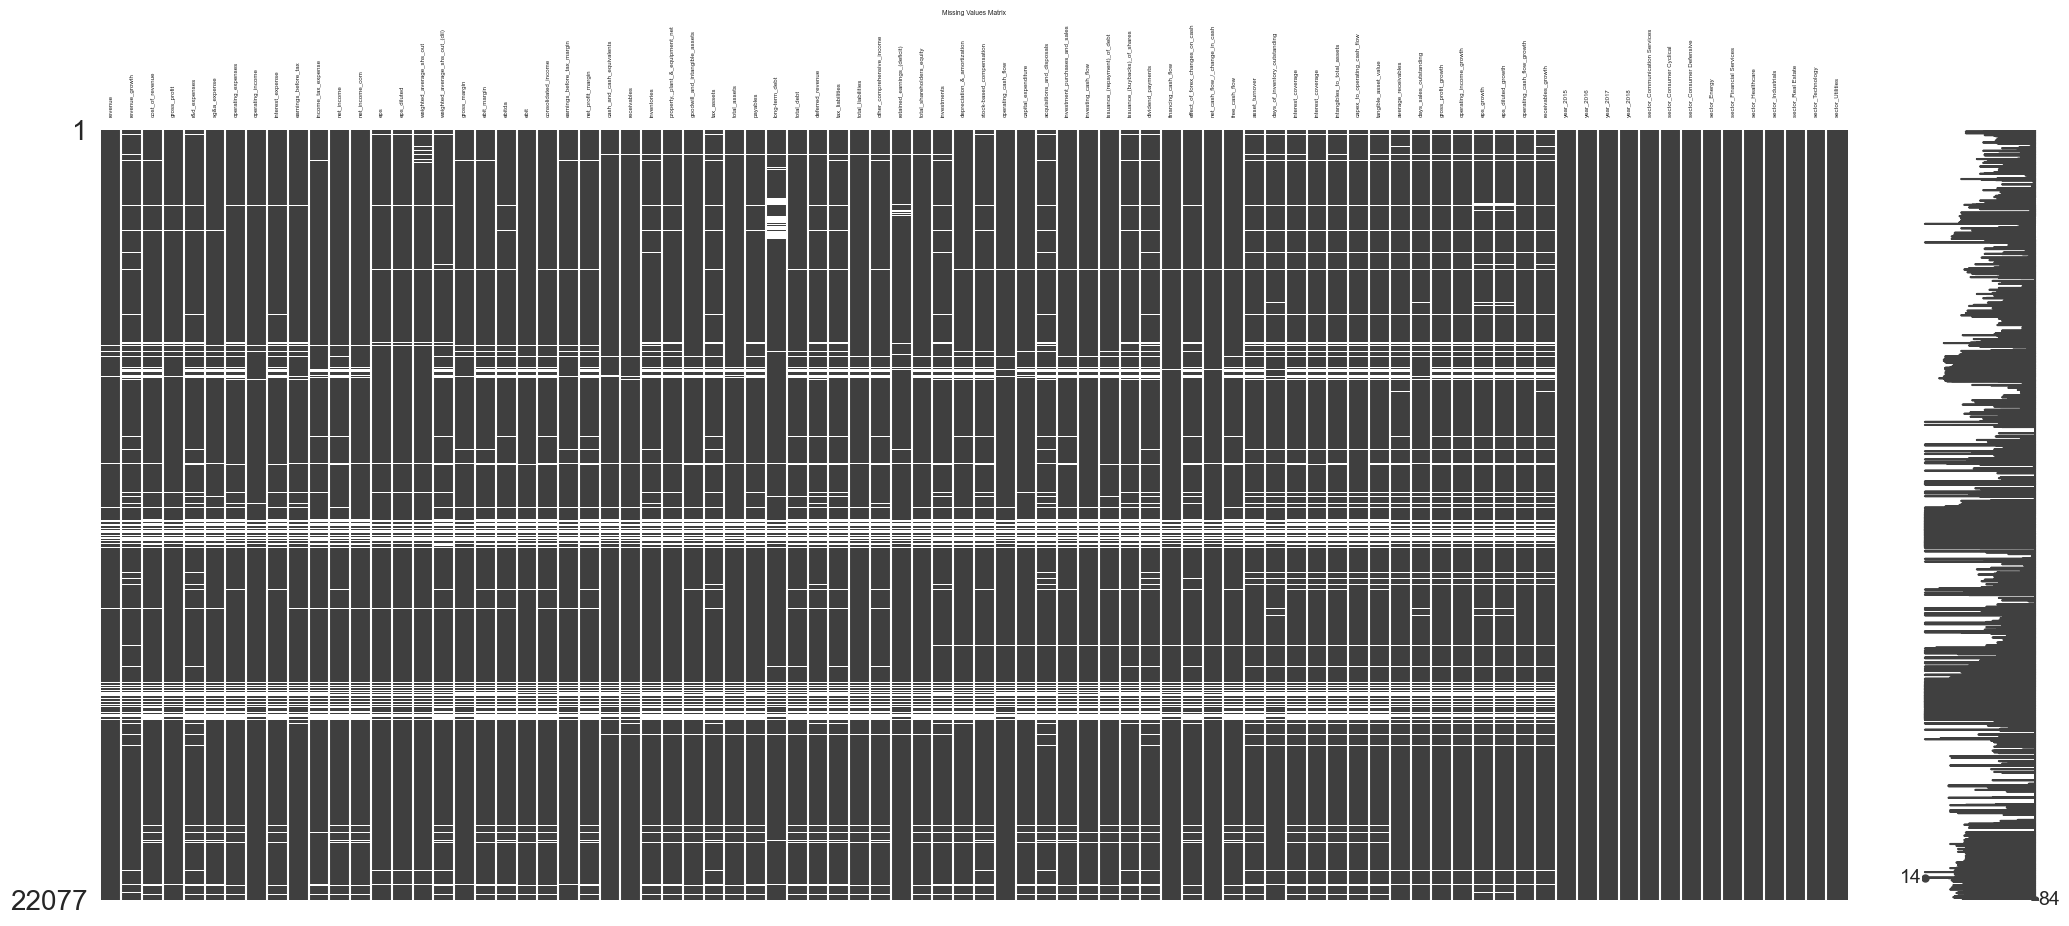

In [34]:
# Visualize the missingness pattern
msno.matrix(X)

plt.title('Missing Values Matrix')
plt.xticks(ticks=range(len(X.columns)), labels=X.columns, rotation=90)  # Set the x-axis ticks to column names
plt.show()

We can see that there are clearly patterns in the white lines indicating the location
of missing values. The sparkline at right summarizes the general shape of the data completeness and
points out the rows with the maximum and minimum nullity in the dataset. We notice that the features
with the most clusters of white spaces include net debt to ebitda, free cash flow yield, current ratio, net
debt, and return on assets. Additionally, we see that there are three general groups of white lines that span
across all of the variables, signifying companies are missing data across all features. These companies
with high-missing-value columns across all years may be dropped. Given the missing data seems not to be
MCAR, mean or median imputation methods may not be suitable. Mode imputation is also not applicable
as most features are numerical. Therefore, we can use kNN imputation to replace missing values using the
k-nearest neighbor mean for each feature.

We now try to gain a better insight on the number of missing values by leveraging the missingno bar plot. Each horizontal bar represents each predictor's non-null values, whose number is reported aside. 

In [35]:
def non_missing_ratio_summary(df):
    """
    Calculate the ratio of non-missing (non-NA) data for each column in the DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame for which to calculate the non-missing ratios.

    Returns:
    - pandas.DataFrame: A DataFrame containing the non-missing ratios for each column.
    """
    # Calculate the total number of data points (number of rows)
    total_data_points = len(df)

    # Calculate the count of non-missing values for each column
    non_missing_counts = df.count()

    # Calculate the ratio of non-missing data points for each column
    non_missing_ratios = non_missing_counts / total_data_points

    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        'Non_Missing_Count': non_missing_counts,
        'Non_Missing_Ratio': non_missing_ratios
    })

    return summary_df

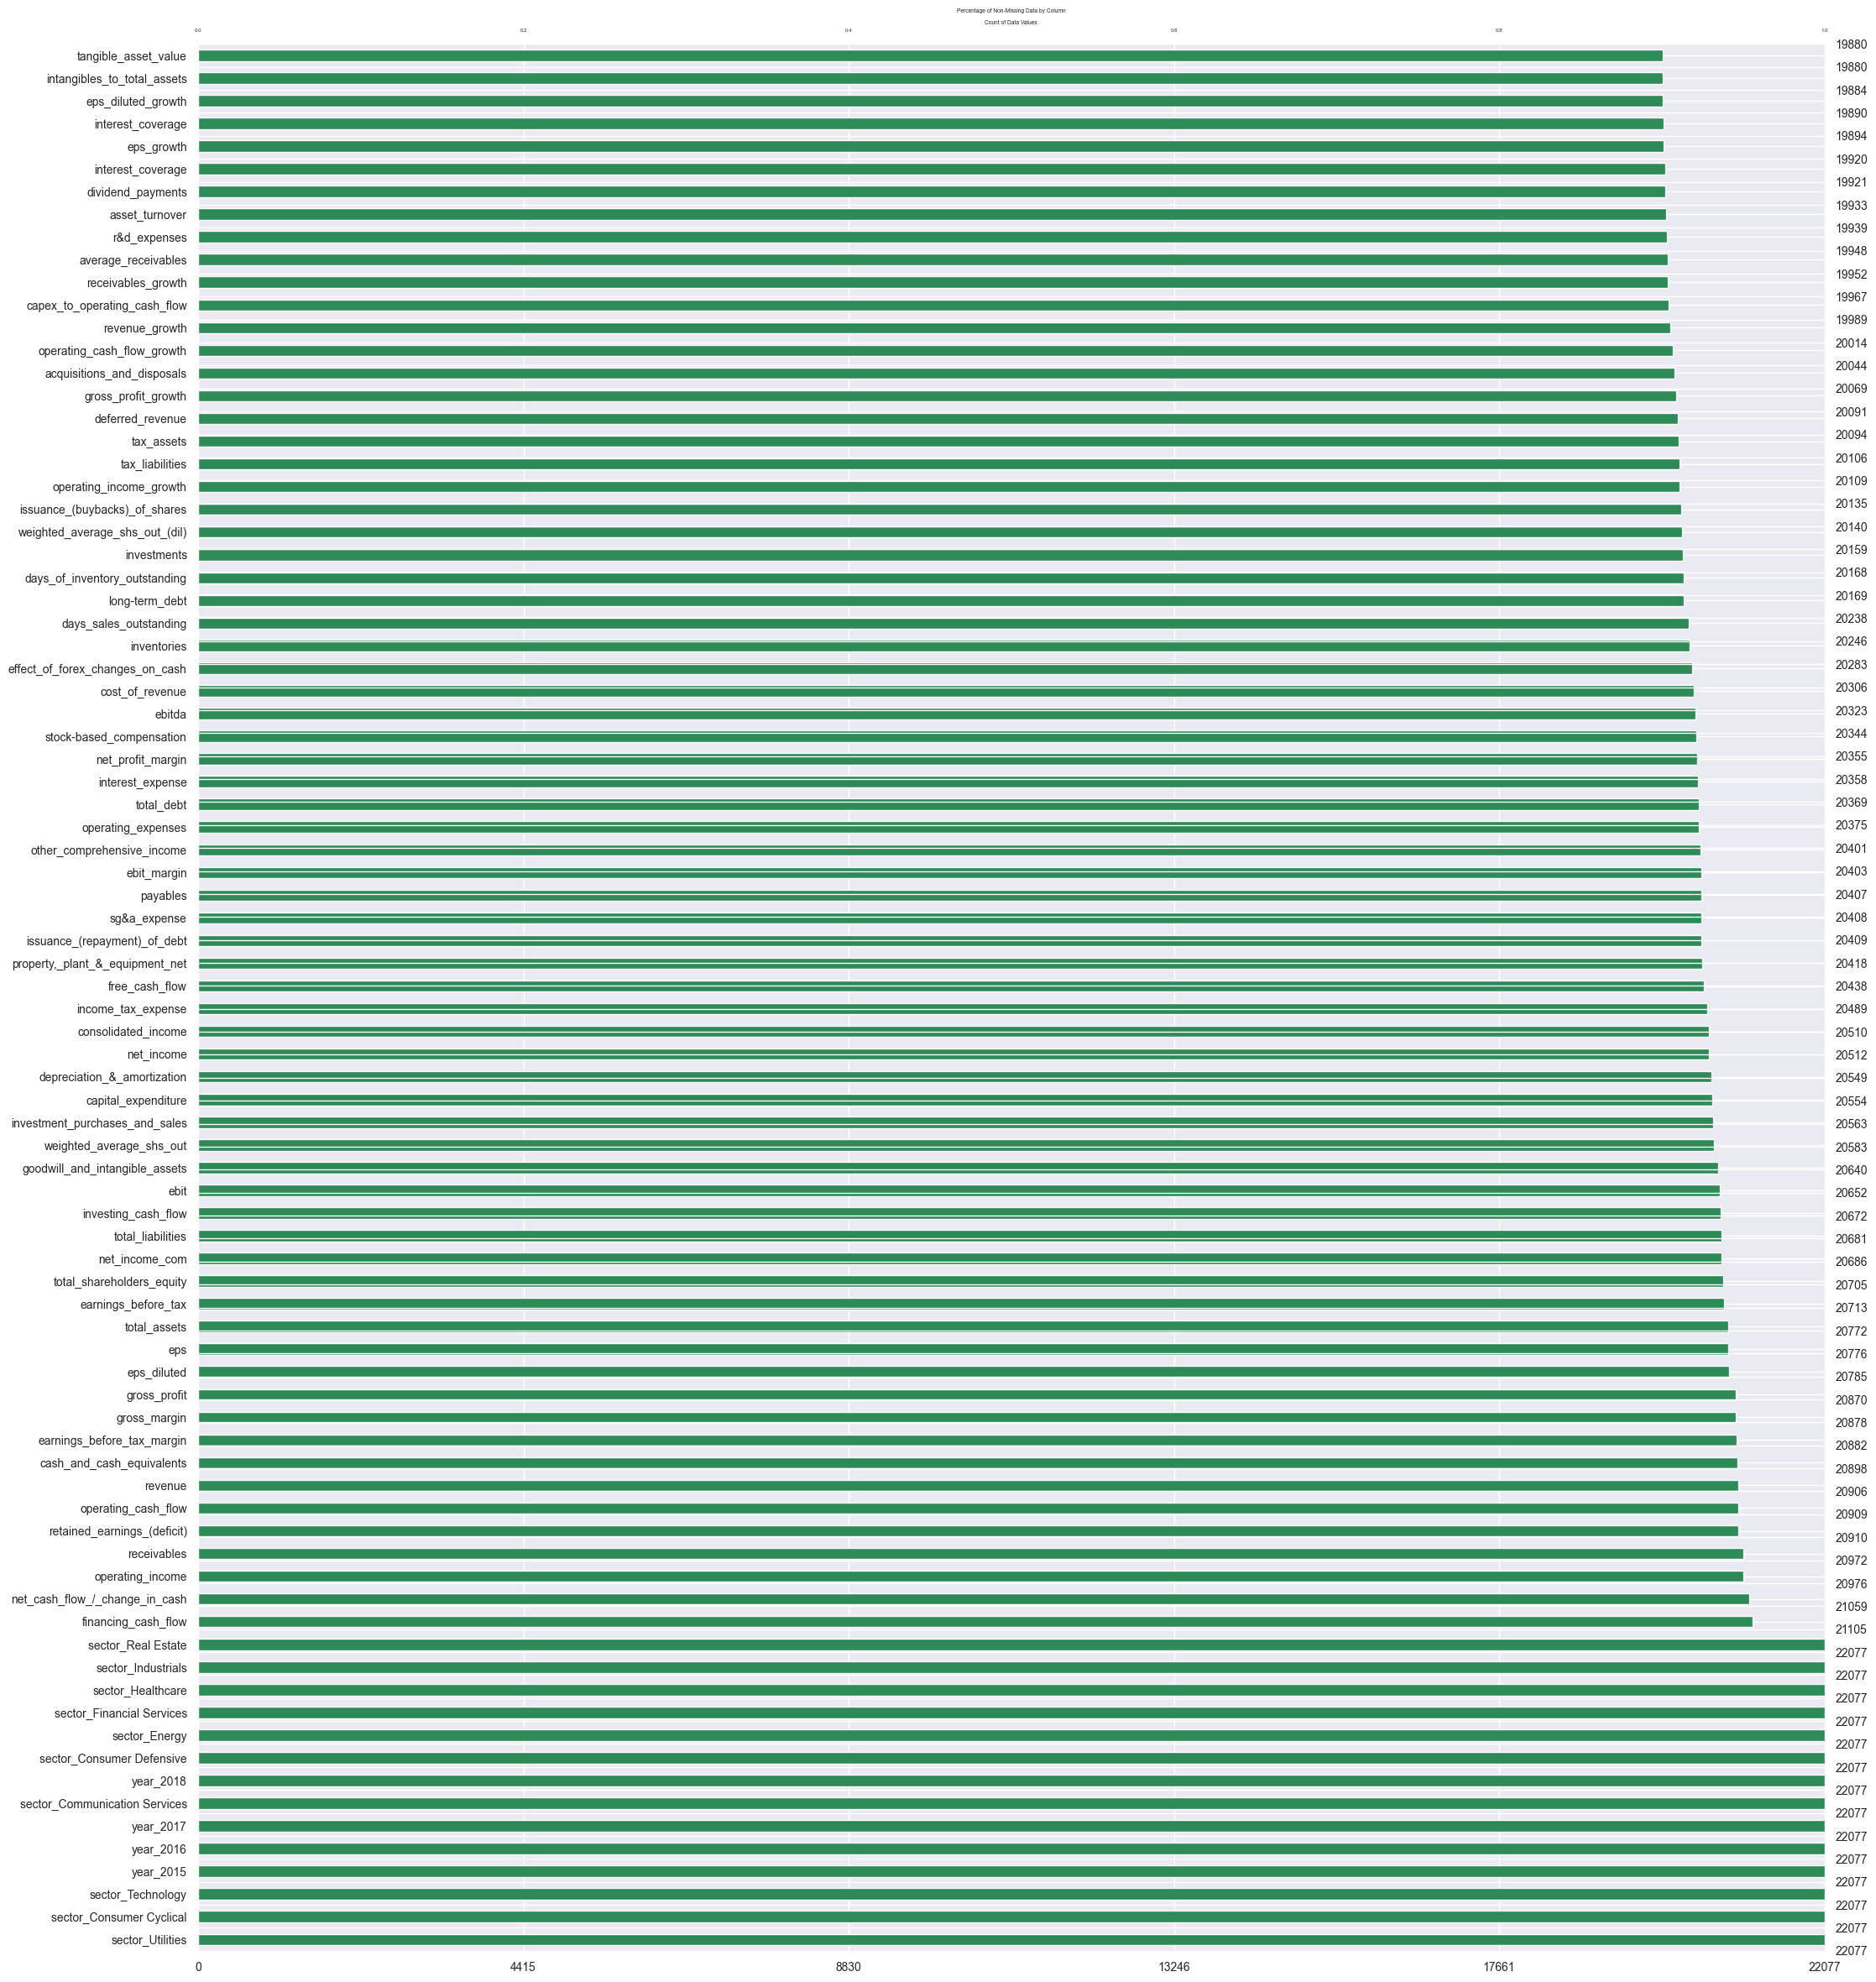

In [36]:
predictors_non_miss_summary = non_missing_ratio_summary(X)
msno.bar(X, fontsize= 10, color="seagreen", sort="descending")
plt.title("Percentage of Non-Missing Data by Column")
plt.ylabel("Percentage of Non-Missing Values")
plt.xlabel("Count of Data Values")
plt.show()


From the visualization above, we see that the bars at the bottom, including sector and year have no missing data while operating income, operating cash flow have very few missing values. The bars near the top, including net debt to ebitda, net debt, return on asset, and current ratio have the most number of missing values. We will keep in mind that the uppermost ones will have
10-15% of values imputed which could introduce biases into our model.

Finally, we utilize the msno heatmap to examine correlation between missing values. 

Text(0.5, 1.0, 'Nullity Correlation Heatmap: -1 (Negative Correlation), 0 (No Correlation), 1 (Positive Correlation)')

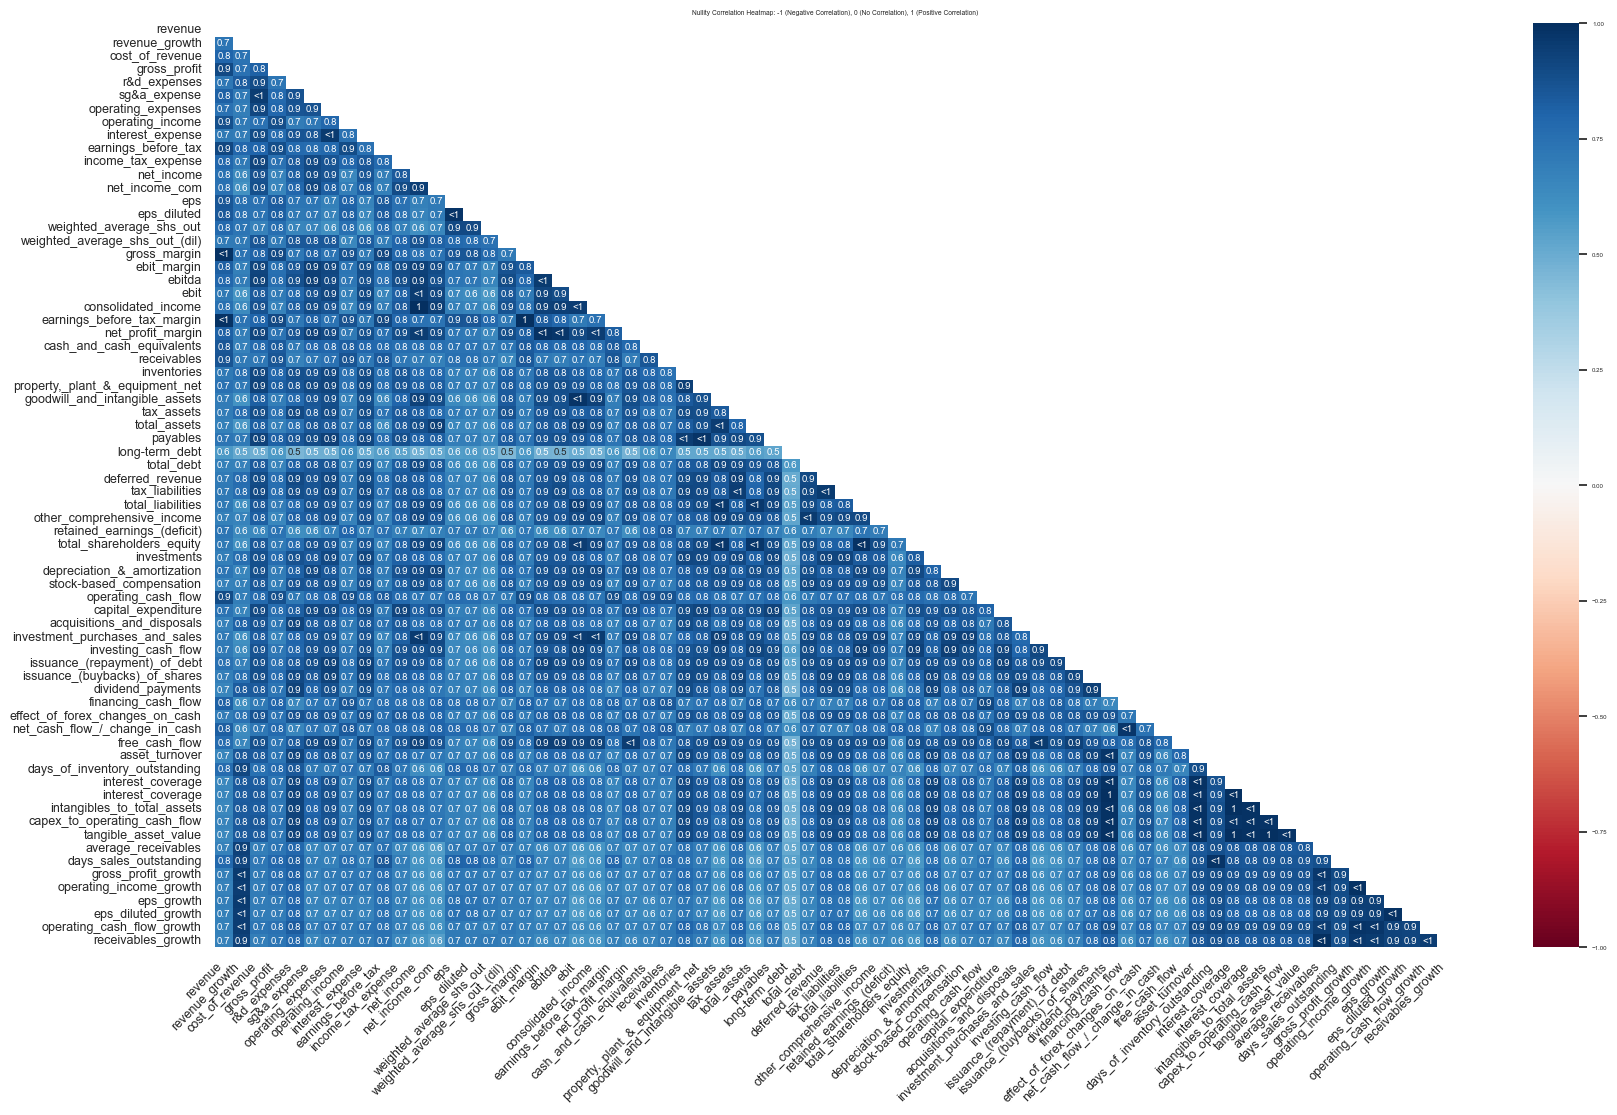

In [37]:
msno.heatmap(X, fontsize=9)
plt.title("Nullity Correlation Heatmap: -1 (Negative Correlation), 0 (No Correlation), 1 (Positive Correlation)")


From the visualization, we see that the nullity correlations range between 0.2 and 1. Certain correlations, including EPS and dividend per share, return on equity, and net debt to EBITDA, remain close to 1. We can conclude that our data is most likely MNAR or MAR.

## 0.4 Handling Outliers

We first take a closer look at our response variable, "price_var_next_yr_%" and notice that our y variable has a long tail.

In [38]:
# y has a long tail, we will drop the outliers
y.describe()

count     22077.0000
mean        269.8893
std       19346.1736
min        -100.3972
25%         -19.4741
50%           3.9091
75%          27.5057
max     2418600.9153
Name: price_var_next_yr_%, dtype: float64

In [39]:
y.quantile(1)

2418600.915311456

In [40]:
y.quantile(0.98)

141.7316788052473

Text(0.5, 0, 'Percentage of Price Var Next Year')

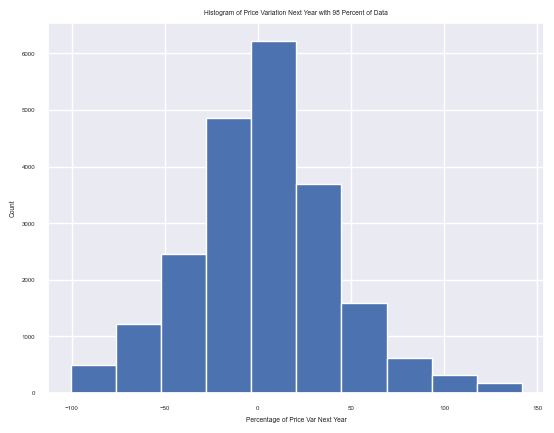

In [41]:
y[y<y.quantile(0.98)].hist()
plt.title("Histogram of Price Variation Next Year with 98 Percent of Data")
plt.ylabel("Count")
plt.xlabel("Percentage of Price Var Next Year")

We observe that y has a long tail and we proceed with dropping the outliers. We end up using the 98% of the data.

In [42]:
indx = y < y.quantile(0.98)

## 0.5 Pipeline Preparation

### Train Test Set Split

We split the data into training and testing sets first to ensure that the model is evaluated on data it hasn't seen during training.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X[indx], y[indx], 
                                                    test_size=0.2, shuffle=True, random_state=123)

### Data Scaling & Imputation

In each algorithm below, we scale the data (numerical predictors) as they are on very different scales. Since K-NN is a distance based algorithm, scaling before imputing is better.

# Part 1: Basic Model Selection

We propose using Ordinary Least Squares (OLS) as our baseline model, with potential adjustments through Lasso or Ridge regularization to mitigate overfitting. We chose OLS over more complex models like decision trees due to its simplicity and lower risk of overfitting, but we remain open to exploring other models based on the results and insights we gain during the initial phases.

Our implementation plan for the OLS model involves the following steps:
1. Data Preprocessing: We employ a KNN Imputer with n_neighbors=1 to handle missing values in our dataset. This aims to impute missing values with a degree of uncertainty.
2. Feature Scaling: We use the Standard Scaler to normalize our features, an essential step for linear models to ensure that all variables are on the same scale.
3. Model Training: We train our processed training set using Linear Regression
4. Prediction and Clipping: Post-training, the model is used to predict outcomes on the test set (X_test). We apply clipping to the predictions to keep them within a realistic range (in this case, -150 to 150
5. Evaluation: The performance of the baseline model is assessed using R^2 and MSE scores

### Linear Regression

In [44]:
y_test.describe()

count   4327.0000
mean       3.5837
std       39.0724
min      -99.9512
25%      -20.3958
50%        3.2790
75%       24.8248
max      141.6989
Name: price_var_next_yr_%, dtype: float64

In [45]:
y_train.describe()

count   17308.0000
mean        3.3708
std        38.8718
min      -100.3972
25%       -20.1050
50%         3.2290
75%        25.9774
max       141.6667
Name: price_var_next_yr_%, dtype: float64

In [46]:
# n_neighbors=1 to impute with uncertainty
# Need to scale for linear regression
lr = Pipeline([('imputer', KNNImputer(n_neighbors=1)),
               ('scaler', StandardScaler()),
               ('model', LinearRegression())])

lr.fit(X_train, y_train)
y_test_lr_pred = lr.predict(X_test)
y_test_lr_pred = np.clip(y_test_lr_pred, -150, 150)  # Since max of y_test and y_train are both under 150
lr_r2 = r2_score(y_test, y_test_lr_pred)
print(f"R^2 score of baseline simple linear regression: {lr_r2:.4f}")
mse_lr = mean_squared_error(y_test, y_test_lr_pred)

R^2 score of baseline simple linear regression: 0.1371


# Part 2: More Complex Models

### Ridge Regression

In [47]:
# n_neighbors=1 to impute with uncertainty
# Need to scale for ridge regression
ridge = Pipeline([('imputer', KNNImputer(n_neighbors=1)),
                  ('scaler', StandardScaler()),
                  ('model', Ridge(alpha=1.0))])

ridge.fit(X_train, y_train)
y_test_ridge_pred = ridge.predict(X_test)
y_test_ridge_pred = np.clip(y_test_ridge_pred, -150, 150)
ridge_r2 = r2_score(y_test, y_test_ridge_pred)
print(f"R^2 score of baseline Ridge regression: {ridge_r2:.4f}")
mse_ridge = mean_squared_error(y_test, y_test_ridge_pred)

R^2 score of baseline Ridge regression: 0.1376


### Lasso Regression

In [48]:
# n_neighbors=1 to impute with uncertainty
# Need to scale for lasso regression
lasso = Pipeline([('imputer', KNNImputer(n_neighbors=1)),
                  ('scaler', StandardScaler()),
                  ('model', Lasso(alpha=1.0))])

lasso.fit(X_train, y_train)
y_test_lasso_pred = lasso.predict(X_test)
y_test_lasso_pred = np.clip(y_test_lasso_pred, -150, 150)
lasso_r2 = r2_score(y_test, y_test_lasso_pred)
print(f"R^2 score of baseline Lasso regression: {lasso_r2:.4f}")
mse_lasso = mean_squared_error(y_test, y_test_lasso_pred)

R^2 score of baseline Lasso regression: 0.1344


### Random Forest

In [ ]:
# n_neighbors=1 to impute with uncertainty
# Don't need to scale for random forest
rf = Pipeline([('imputer', KNNImputer(n_neighbors=1)),
               ('model', RandomForestRegressor(max_depth=12, random_state=123))])

rf.fit(X_train, y_train)
rf_acc = rf.score(X_test, y_test)

print(f"Accuracy of baseline random forest: {rf_acc:.4f}")
y_test_rf_pred = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_test_rf_pred)

## 2.1 Evaluation

In [ ]:
# Print R^2 and MSE for each model
print(f"\n{'Model':<20} {'R^2 Score':<20} {'MSE':<20}")
print("-" * 60)
print(f"{'Linear Regression':<20} {lr_r2:.4f} {'':<13} {mse_lr:.4f}")
print(f"{'Ridge Regression':<20} {ridge_r2:.4f} {'':<13} {mse_ridge:.4f}")
print(f"{'Lasso Regression':<20} {lasso_r2:.4f} {'':<13} {mse_lasso:.4f}")
print(f"{'Random Forest':<20} {rf_acc:.4f} {'':<13} {mse_rf:.4f}")

If we take a closer look at the metrics, we notice a very low $R^2$ score for each model, which makes that specific metric less relevant toward model selection. We also observe fairly similar MSEs, with a lower value characterizing the Random forest, which is the preferred model according to the reported metric. Moving a step further, with the goal of selecting a suitable and effective model, we can take a moment to observe the dataset we are working on. Random forest seems to be the model to favor given the high-dimensionality of the dataset. 

### Final Model Choice

For our final model, we have chosen the Random Forest algorithm based on several reasons:
1. Robustness to Overfitting: Random Forest, with its ensemble approach of using multiple decision trees, tends to be more robust against overfitting compared to individual decision trees.
2. Ability to Handle Non-linear Relationships: When relationships between features and the response variable are complex and nonlinear, which is likely true in this case
3. Feature Importance: Random Forest provides insights into feature importance, which can be valuable for understanding the driving factors behind the predictions
4. Versatility: It performs well on both classification and regression tasks and can handle both categorical and continuous data, which we have

The implementation plan for the Random Forest model includes:
1. Data Imputation: Similar to our baseline model, we use a KNN Imputer with n_neighbors=1 for handling missing values
2. Model Training: We train our model using the Random Forest regressor. Here, we have set max_depth=12 to control the depth of the trees, preventing them from becoming too complex and overfitting. 
3. Evaluation: The performance of the baseline model is assessed using R^2 and MSE scores

<a id="project_organization"></a>

## Part 3: Network Analysis of Stock Market Interdependencies

[Return to contents](#contents)